## Plataforma Interativa de Aprendizado em Inteligência Artificial

* Algoritmo de Agrupamento K-Means

* Felipe Daniel Dias dos Santos - 11711ECP004

* Graduação em Engenharia de Computação - Faculdade de Engenharia Elétrica - Universidade Federal de Uberlândia

### INTRODUÇÃO

Agrupar dados ou objetos de acordo com suas características tem muita utilidade, seja na nossa vida diária, seja em áreas complexas do conhecimento, como medicina, economia ou ciência de dados. Diversas aplicações podem se beneficiar da técnica de agrupamento de dados, por exemplo, podemos utilizar da vantagem do agrupamento no setor comercial para identificar e segmentar perfis de clientes para uma campanha de Marketing ou agrupar pacientes com sintomas similares para identificar situações de risco em novos casos. É fácil intuir que o agrupamento é uma técnica bastante útil para diversos cenários. 

O processo para agrupamento de dados se baseia no conceito de similaridade, ou seja, a ideia principal é encontrar itens semelhantes de acordo com seus atributos. Um dos mais simples e conhecidos métodos de agrupamento é chamado de K-means. O K-means é um algoritmo não supervisionado de agrupamento de dados que objetiva particionar ***n*** elementos, ***x1, x2, ..., xn***, dentre ***k*** grupos, ***G1, G2, ..., Gk***. O objetivo é encontrar similaridades entre os elementos e agrupá-los conforme os ***k*** grupos. 

O algoritmo, de forma iterativa, atribui os elementos ao grupo que lhe seja mais similar. Considerando essa breve descrição, duas questões são colocadas: 

1. Como caracterizar um grupo e;
2. Como atribuir um elemento a um grupo, isto é, como determinar o melhor grupo para cada elemento.

Quanto à primeira questão, o K-means adota o conceito de centróide, definido como o centro ou média do grupo, onde ***c(Gi)*** é o centróide do grupo ***Gi***. Se você imaginar o grupo como uma circunferência, então o centróide do mesmo estaria localizado no centro geométrico dessa circunferência. Existem diversas formas de calcular o centróide de um grupo, sendo a média aritmética e média quadrática dos elementos as mais utilizadas. Dessa forma, cada grupo é caracterizado por um centróide, que é único dentre todos os grupos.

Quanto à segunda questão, é utilizado o conceito de distância, onde  ***d(xi, xj)*** é a distância entre os elementos ***xi*** e ***xj***. Assim como o centróide, a distância pode ser calculada de mais de uma forma, sendo a distância Euclidiana a mais simples e bem conhecida. Dado um elemento ***xj***, devemos ser capazes de calcular a distância entre ***xj*** e o centroide ***c(Gi)*** de cada grupo. Portanto, determinamos que um elemento qualquer ***xj*** do conjunto de dados pertence ao grupo ***Gi*** tal que ***d(xj, c(Gi))*** é mínimo. Em outras palavras, ***xj*** pertence a ***Gi*** se ***d(xj, c(Gi)) ≤ d(xj, c(Gm))***, para ***1 ≤ m ≤ k***. 

Resumindo, a estratégia do algoritmo é definir ***k*** grupos, assim como seus centróides e atribuir os elementos do conjunto de dados a cada grupo levando em conta as distâncias entre os elementos e os centróides. Ao fim do algoritmo, é esperado que os elementos estejam agrupados conforme suas similaridades, de forma que esse agrupamento seja bem próximo do ótimo. O algoritmo possui 4 passos, dados a seguir:

1. Gere, aleatoriamente, ***k*** pontos. Esses pontos representam os centróides dos grupos;
2. Atribua cada elemento ao grupo que possui o centróide mais próximo, isto é, que possui a menor distância;
3. Quando todos os elementos tiverem sido atribuídos, recalcule as posições dos ***k*** centróides, utilizando a média dos elementos do grupo;
4. Repita os passos 2 e 3 até que os centróides se tornem estáticos ou que algum critério de parada seja satisfeito.

Para que os centróides sejam considerados estáticos, é necessário que não haja uma mudança significativa em suas movimentações. Assim, se essas movimentações (módulo da diferença entre a posição atual e a posição anterior) for menor que um valor pré-estabelecido, então podemos inferir que, com alta probabilidade, os centróides não irão se movimentar muito mais daqui em diante e, portanto, os elementos pertencem ao grupo que estão nesse momento. Dessa forma, não faz sentido que o algoritmo continue executando, pois o melhor resultado possível, dadas as condições iniciais, já foi encontrado. Além disso, a finalização do algoritmo também pode depender de uma condição de parada. Um exemplo muito utilizado de condição de parada é a quantidade de iterações ultrapassar um valor previamente definido.  

É de extrema importância a correta escolha do número de grupos para a viabilidade do projeto. Quando temos um problema bem definido a escolha desse parâmetro irá se basear nos requisitos do negócio. Caso o número de grupos que devemos escolher não seja claro, existem diversos métodos para tentar encontrar o parâmetro adequado, como o elbow. Basicamente, o elbow testa a variância dos dados em relação ao número de grupos até o momento que o aumento do número de grupos não representa um valor significativo de ganho. Nesse ponto, o método encontrou o número ideal para ***k***.

Embora possa ser provado que o procedimento sempre terminará, o algoritmo K-means não necessariamente encontra a configuração ótima. De fato, o objetivo do algoritmo não é gerar um resultado comprovadamente ótimo, mas sim um resultado "suficientemente bom", pois devido a natureza do problema, o agrupamento ótimo é classificado como NP-difícil. O algoritmo também é significativamente sensível aos centróides selecionados aleatoriamente, de forma que o mesmo pode ser executado várias vezes para reduzir esse efeito.

É importante destacar que os dados podem ter tantas dimensões quanto se queira. Isto é, cada elemento no conjunto de dados é um vetor com a quantidade de atributos que forem necessários. Por exemplo, podemos ter um conjunto de dados onde cada elemento é o preço de um produto (dados unidimensionais), assim como também podemos ter um conjunto de dados onde cada elemento é o preço e a quantidade de vendas de um produto (dados bidimensionais). A natureza dos dados dependem exclusivamente da aplicação desejada.

Sempre que um problema de agrupamento de dados surgir, seja ele simples ou complexo, o K-means é uma escolha adequada. Sua simplicidade e eficiência o tornam um dos algoritmos de agrupamento mais populares no mundo do aprendizado de máquina, oferecendo resultados satisfatórios em muitos casos.

Para demonstrar e visualizar os conceitos e ideias do K-means, vamos a um exemplo. Suponha que você possua uma base de dados contendo informações relevantes sobre seus vinhos, como nível de álcool, pH e densidade. Você possui uma adega e deseja dividir os vinhos em diferentes prateleiras, de acordo com suas similaridades. O algoritmo K-means parece ideal para agrupar os vinhos e decidir quais serão armazenados nas mesmas prateleiras.

Para realizar tal tarefa, seguiremos um passo-a-passo simplificado a seguir, em Python, onde todos os códigos necessários serão mostrados e explicados, de forma a resolver o problema em questão, interpretando os resultados corretamente.

### PASSO 01

###### **Descrição**
O primeiro passo no desenvolvimento da solução é a aquisição e a análise da base de dados em que se pretende trabalhar. Para isso, é fundamental a importação de bibliotecas do Python que contém as ferramentas matemáticas necessárias para a manipulação das estruturas de dados em questão. A primeira delas é o **numpy**, que nos permite realizar cálculos diversos em vetores e matrizes. A segunda é o **pandas**, utilizada para manipular e analisar dados. Logo, nesse primeiro passo, devemos importar as bibliotecas **numpy** e **pandas** para que tenhamos uma caixinha de ferramentas útil e eficiente para utilizar ao longo do desenvolvimento.

###### **Questão**
Como importar as bibliotecas **numpy** e **pandas**?

###### **Resposta**
[import numpy as np; import pandas as pd]

###### **Palavras-Chave**
[import; numpy; np; pandas; pd]

In [ ]:
#Importando as bibliotecas numpy e pandas
import numpy as np
import pandas as pd

### PASSO 02

###### **Descrição**
Assim que as bibliotecas forem importadas, devemos obter a base de dados que será trabalhada. Nesse caso, nossa base de dados se chama **vinhos.csv**, e deve estar localizada no mesmo diretório deste notebook. Para importá-la, podemos utilizar a função **read_csv(dir)** da biblioteca **pandas**, onde **dir** é o diretório da base de dados. Essa função nos permite trabalhar com arquivos do tipo **csv**, assim, é necessário se certificar de que os dados a serem utilizados estão contidos em um arquivo do tipo **csv**. No segundo passo, vamos importar a base de dados **vinhos.csv** e armazená-la em uma variável chamada **tabela_dados**. Assim, todas as informações necessárias à execução do algoritmo serão encontradas na variável **tabela_dados**.

###### **Questão**
Como importar a base de dados **vinhos.csv**?

###### **Resposta**
[tabela_dados = pd.read_csv('vinhos.csv')]

###### **Palavras-Chave**
[tabela; dados; read; csv; vinhos]

In [ ]:
#Importando a base de dados e atribuindo seus valores a uma variável
tabela_dados = pd.read_csv('vinhos.csv')

### PASSO 03

###### **Descrição**
Após a importação da nossa base de dados e atribuição a uma variável local, vamos visualizá-la em sua forma original, isto é, na forma de uma tabela. A biblioteca **pandas** possui o método **head(n)** para a visualização de uma base de dados importada, onde **n** é a quantidade de linhas da tabela que serão mostradas. É possível visualizar somente algumas linhas ou até mesmo toda a base de dados. Nesse passo, vamos imprimir 10 linhas da tabela, somente para ter um esboço dos dados e dos atributos dos vinhos dos quais iremos trabalhar.  

###### **Questão**
Como visualizar as 10 primeiras linhas da base de dados **tabela_dados**? 

###### **Resposta**
[tabela_dados.head(10)]

###### **Palavras-Chave**
[tabela; dados; head]

In [ ]:
#Visualizando alguns elementos da base de dados
tabela_dados.head(10)

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,alcool
0,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,98.0,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,92.0,15.0,54.0,997.0000,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,75.0,17.0,60.0,998.0000,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,75.0,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,69.0,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,65.0,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,73.0,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,71.0,17.0,102.0,0.9978,3.35,0.80,10.5


### PASSO 04

###### **Descrição**
Para termos uma melhor visualização dos dados obtidos, seria interessante obtermos os histogramas das características dos objetos da nossa base de dados. Um histograma nos ajuda a entender a distribuição das características a serem estudadas, isto é, a quantidade de elementos presentes em cada intervalo de valores. O método **hist(col)** da biblioteca **pandas** é utilizado para plotar o histograma dos valores contidos em uma coluna de nome **col** de uma base de dados importada. Para plotar os histogramas de todas as características em questão, precisamos executar o comando **hist(col)** 11 vezes, uma para cada coluna da base de dados **tabela_dados**. Observe o resultado: temos 11 histogramas, caracterizando a distribuição de valores dos atributos dos vinhos da nossa base de dados.

###### **Questão**
Como plotar os histogramas referentes às colunas da base de dados **tabela_dados**? 

###### **Resposta**
[tabela_dados.hist('acidez fixa'); tabela_dados.hist('acidez volátil'); tabela_dados.hist('ácido cítrico'); tabela_dados.hist('açúcar residual'); tabela_dados.hist('cloretos'); tabela_dados.hist('dióxido de enxofre livre'); tabela_dados.hist('dióxido de enxofre total'); tabela_dados.hist('densidade'); tabela_dados.hist('pH'); tabela_dados.hist('sulfatos'); tabela_dados.hist('alcool')]

###### **Palavras-Chave**
[tabela; dados; hist]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff30bf15710>]],
      dtype=object)

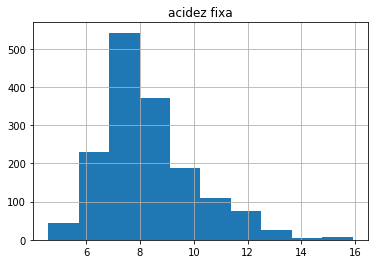

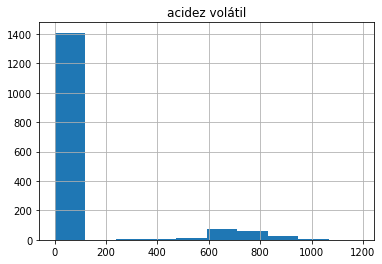

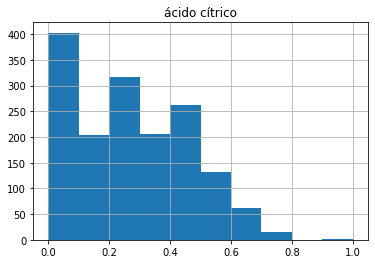

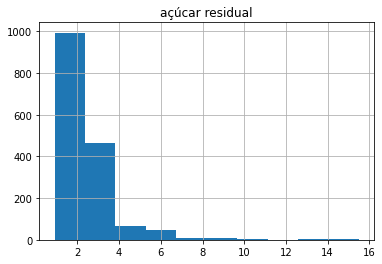

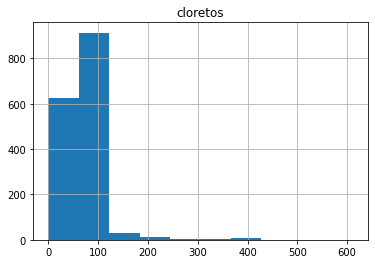

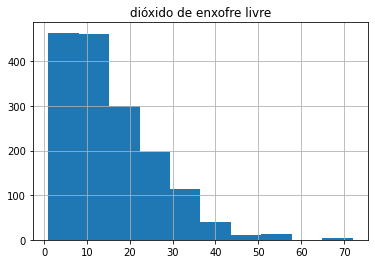

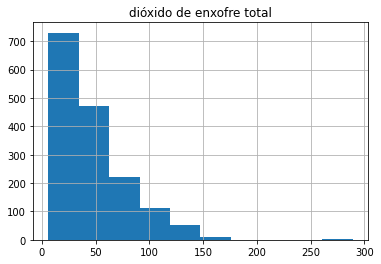

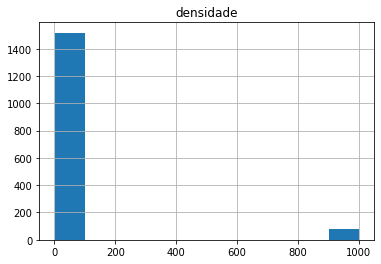

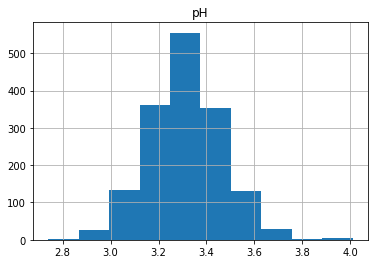

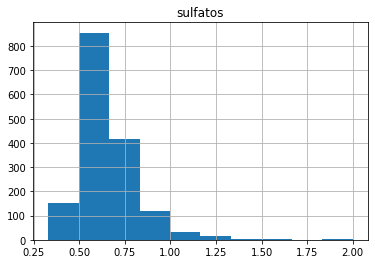

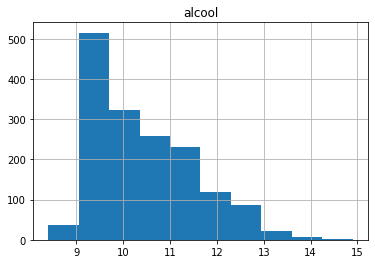

In [ ]:
#Plotando os histogramas da base de dados
tabela_dados.hist('acidez fixa')
tabela_dados.hist('acidez volátil')
tabela_dados.hist('ácido cítrico')
tabela_dados.hist('açúcar residual')
tabela_dados.hist('cloretos')
tabela_dados.hist('dióxido de enxofre livre')
tabela_dados.hist('dióxido de enxofre total')
tabela_dados.hist('densidade')
tabela_dados.hist('pH')
tabela_dados.hist('sulfatos')
tabela_dados.hist('alcool')

### PASSO 05

###### **Descrição**
Observamos no passo anterior que nossa base de dados contém 11 características químicas distintas sobre os vinhos. Todos esses atributos serão utilizados posteriormente para que o algoritmo K-means consiga agrupar nossos vinhos. Para facilitar o trabalho, é interessante que transformemos essa tabela em um vetor 11-dimensional, onde cada posição se refere a um vinho e possui todos os atributos referentes ao mesmo. A biblioteca **numpy** pode nos auxiliar nesse sentido com a função **asarray(ed)**, que transforma a estrutura de dados **ed** em um vetor. Após a transformação, vamos armazenar o resultado na variável **vetor_dados**. A razão dessa transformação é simples: manipular e modelar vetores é uma tarefa trivial, principalmente com o auxílio da biblioteca **numpy**, especialista em tratar tal estrutura.     

###### **Questão**
Como transformar a base de dados **tabela_dados** em um vetor? 

###### **Resposta**
[vetor_dados = np.asarray(tabela_dados)]

###### **Palavras-Chave**
[vetor; dados; asarray; tabela]

In [ ]:
#Transformando a base de dados em vetor
vetor_dados = np.asarray(tabela_dados)

### PASSO 06

###### **Descrição**
Para verificarmos que os dados da nossa base realmente estão em formato de vetor, podemos visualizar os primeiros 2 elementos, cada um contendo 11 atributos, que se referem às suas 11 características, como observamos na tabela do Passo 03. Podemos acessar todos os atributos dos **n** primeiros elementos do vetor **vetor_dados**, utilizamos o comando **vetor_dados[0:n, :]**, onde **0:n** denota que queremos acessar os **n** primeiros elementos e **:** denota que queremos obter todos os atributos de cada elemento. A operação **k:n** é utilizada para obter todos os elementos presentes nas posições pertencentes ao intervalo **[k, n - 1]**, sendo que a ausência de limites, isto é, o operador **:**, é utilizado para obter todos os atributos existentes no vetor. Dessa forma, o comando **vetor_dados[0:2, :]** retorna todos os atributos dos elementos das posições 0 e 1 (observe que o elemento 2 não é incluído). Para imprimir os dados obtidos, utilizamos o comando **print**. Você pode comparar o resultado com a tabela obtida no Passo 03.

###### **Questão**
Como imprimir os 2 primeiros elementos do vetor **vetor_dados**? 

###### **Resposta**
[print(vetor_dados[0:2, :])]

###### **Palavras-Chave**
[print; vetor; dados]

In [ ]:
#Imprimindo alguns elementos do vetor de vinhos
print(vetor_dados[0:2, :])

[[ 7.4     0.7     0.      1.9    76.     11.     34.      0.9978  3.51
   0.56    9.4   ]
 [ 7.8     0.88    0.      2.6    98.     25.     67.      0.9968  3.2
   0.68    9.8   ]]


### PASSO 07

###### **Descrição**
Agora que já conhecemos e temos nossos dados prontos, podemos preparar o algoritmo K-means para ser executado. Para isso, importamos a biblioteca **sklearn.cluster**, que contém todas as funções que precisamos para realizar o agrupamento de dados.

###### **Questão**
Como importar a biblioteca **sklearn.cluster**? 

###### **Resposta**
[import sklearn.cluster as sk]

###### **Palavras-Chave**
[import; sklearn; cluster; sk]

In [ ]:
#Importando a biblioteca sklearn.cluster
import sklearn.cluster as sk

### PASSO 08

###### **Descrição**
Nesse passo, vamos configurar os parâmetros do algoritmo para ser executado em seguida. A função **KMeans(param)** cria uma instância de algoritmo dada a lista de parâmetros **param**. São diversos os parâmetros que podemos alterar, como a quantidade de grupos que desejamos, quantidade de iterações do algoritmo, etc. Porém, para nossa finalidade, não há necessidade de alteração da maioria desses parâmetros, visto que sua configuração padrão é suficiente para obtermos os resultados desejados. O único atributo que vamos modificar é a quantidade de grupos, afinal, essa escolha está relacionada a estrutura do nosso projeto. Nesse caso, a escolha depende de você: quantas prateleiras existem para armazenar seus vinhos? Para o exemplo, vamos imaginar que sejam 4 prateleiras, ou seja, nosso algoritmo deve executar para realizar o agrupamento em 4 grupos distintos, de modo que esse valor deve ser passado para a função. O parâmetro número de grupos é denotado por **n_clusters** e deve ser passado para a função **KMeans** juntamente com a atribuição do valor desejado. Para isso, executamos **KMeans(n_clusters = 4)** e atribuímos o resultado a alguma variável, digamos **k_means**, para que possamos utilizá-la em seguida.

###### **Questão**
Como configurar uma instância do algoritmo K-means dado o número de grupos? 

###### **Resposta**
[k_means = KMeans(n_clusters = 4)]

###### **Palavras-Chave**
[KMeans; clusters]

In [ ]:
#Configurando o algoritmo, definindo a quantidade de grupos
k_means = sk.KMeans(n_clusters = 4)

### PASSO 09

###### **Descrição**
Como um último passo de configuração, atribuímos nossa base de dados para a instância de K-means que criamos. Para tal, utilizamos o método **fit(vet)**, onde **vet** é o vetor contendo a base de dados. Esse método é chamado por uma instância de K-means que, no nosso caso, está armazenada na variável **k_means**. Observe que o resultado exibe os parâmetros do algoritmo e os valores atribuídos aos mesmos. Porém, não vamos nos atentar aos detalhes, o que nos importa no momento é o atributo **n_clusters = 4**, isto é, o algoritmo foi ajustado para dividir nossos dados em 4 grupos distintos.

###### **Questão**
Como atribuir a base de dados **vetor_dados** à instância de algoritmo **k_means**? 

###### **Resposta**
[k_means.fit(vetor_dados)]

###### **Palavras-Chave**
[means; fit; vetor; dados]

In [ ]:
#Atribuindo a base de dados ao algoritmo
k_means.fit(vetor_dados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### PASSO 10

###### **Descrição**
Nesse momento, temos o que é necessário para executar o algoritmo. O que realmente desejamos é agrupar nossos vinhos de acordo com suas similaridades. Para isso, devemos obter bons centróides para cada um dos 11 atributos considerados. Isso é feito com o método **cluster_centers_**, que também é chamado por uma instância de K-means. A chamada desse método retorna um vetor contendo os centróides obtidos após a execução do algoritmo, dados os parâmetros e dados configurados anteriormente. Como você pode observar no resultado do Passo 09, nosso algoritmo foi configurado para terminar sua execução após 300 iterações, ou seja, os centróides serão ajustados e refinados 300 vezes. Vamos atribuir esse vetor resultante a uma variável chamada **centroides**, que vamos utilizar posteriormente.

###### **Questão**
Como executar a instância de algoritmo **k_means** e obter os centróides da base de dados?

###### **Resposta**
[centroides = k_means.cluster_centers_]

###### **Palavras-Chave**
[centroides; means; cluster; centers]

In [ ]:
#Obtendo os centróides da base de dados
centroides = k_means.cluster_centers_

### PASSO 11

###### **Descrição**
Nesse passo, vamos visualizar os resultados obtidos. Podemos executar **print(centroides)** para imprimir o vetor de centróides obtidos na execução do algoritmo. Observe que esse vetor possui 4 elementos, referentes aos 4 grupos, onde cada um deles possui 11 valores, referentes aos 11 atributos considerados.

###### **Questão**
Como visualizar os centróides obtidos? 

###### **Resposta**
[print(centroides)]

###### **Palavras-Chave**
[print; centroides]

In [ ]:
#Visualizando os centróides obtidos
print(centroides)

[[8.33253731e+00 1.64674627e+00 2.82492537e-01 2.52791045e+00
  5.65607448e+01 1.60988806e+01 4.63425373e+01 9.96687239e-01
  3.30933582e+00 6.62208955e-01 1.04669527e+01]
 [8.05875706e+00 7.16016949e+02 1.67005650e-01 2.69152542e+00
  5.88647514e+01 1.43587571e+01 4.54971751e+01 9.96966328e-01
  3.32909605e+00 6.24406780e-01 1.01660075e+01]
 [8.74794521e+00 5.12465753e-01 3.18219178e-01 2.33356164e+00
  6.15055753e+01 1.55479452e+01 4.86712329e+01 9.97205479e+02
  3.29273973e+00 6.67945205e-01 1.02376712e+01]
 [8.05555556e+00 7.40555556e+02 2.17777778e-01 2.82222222e+00
  8.10124444e+01 1.50000000e+01 6.63333333e+01 9.97555556e+02
  3.37111111e+00 6.37777778e-01 1.04333333e+01]]


### PASSO 12

###### **Descrição**
Finalmente, podemos agrupar os dados considerando os centróides obtidos. Isso é realizado com o método **labels_**, chamado por uma instância de K-means já executada e com resultados prontos. O resultado da execução desse método é um vetor, onde o i-ésimo elemento denota o grupo no qual o i-ésimo vinho da base de dados pertence. Nossa base de dados possui 1599 vinhos, logo, nosso vetor, que iremos armazenar em uma variável de nome **grupos**, possui 1599 elementos. Cada um desses elementos pertence ao intervalo [0, 3], isto é, cada vinho pertence ao grupo 0, 1, 2 ou 3, pois definimos como 4 a quantidade de grupos.

###### **Questão**
Como agrupar os dados utilizando os centróides obtidos? 

###### **Resposta**
[grupos = k_means.labels_]

###### **Palavras-Chave**
[grupos; means; labels]

In [ ]:
#Agrupando os vinhos da base de dados
grupos = k_means.labels_

### PASSO 13

###### **Descrição**
Vamos visualizar o grupo de alguns vinhos, digamos, dos 30 primeiros, utilizando o comando **print**. Como deve se recordar, o operador **:** pode ser utilizado para restringir os dados obtidos de um vetor, de forma que **grupos[0:30]** obtêm os 30 primeiros elementos do vetor **grupos**. Observe o vetor resultante: os elementos com o mesmo valor pertencem ao mesmo grupo. Com esse resultado, você já é capaz de armazenar seus vinhos nas 4 prateleiras disponíveis.

###### **Questão**
Como visualizar os grupos de 30 elementos do vetor de dados? 

###### **Resposta**
[print(grupos[0:30])]

###### **Palavras-Chave**
[print; grupos]

In [ ]:
#Visualizando os grupos de alguns vinhos
print(grupos[0:30])

[0 0 2 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


### PASSO 14

###### **Descrição**
Nesse passo, vamos ter um vislumbre mais detalhado da distribuição de grupos. Para tal, podemos obter a quantidade de vinhos presente em cada classe para termos uma noção da frequência dos dados em cada grupo. Contar a quantidade de elementos de um vetor qualquer é uma tarefa bem simples com a biblioteca **collections**. Dessa forma, vamos importá-la para utilizar algumas de suas funções.

###### **Questão**
Como importar a biblioteca **collections**? 

###### **Resposta**
[import collections as clt]

###### **Palavras-Chave**
[import; collections; clt]

In [ ]:
#Importando a biblioteca collections
import collections as clt

### PASSO 15

###### **Descrição**
Com a biblioteca **collections** importada, podemos utilizar a função **Counter(vet)** para contar a quantidade de ocorrências de todos os elementos de um vetor **vet**. Utilizamos **print** para visualizar o resultado. Observe que temos como resultado uma coleção de elementos do tipo chave: valor, onde a chave é o identificador de um grupo e o valor é a quantidade de ocorrências do mesmo, isto é, a quantidade de elementos do grupo identificado pela chave. Isso nos permite analisar melhor a distribuição de vinhos nas prateleiras.  

###### **Questão**
Como contar a quantidade de elementos presente em cada grupo? 

###### **Resposta**
[print(clt.Counter(grupos))]

###### **Palavras-Chave**
[print; Counter; grupos]

In [ ]:
#Visualizando a distribuição de elementos nos grupos
print(clt.Counter(grupos))

Counter({0: 1340, 1: 177, 2: 73, 3: 9})


### PASSO 16

###### **Descrição**
Já possuímos o agrupamento desejado e nossos vinhos podem ser colocados nas 4 prateleiras. Nesse passo, tudo que faremos é armazenar os resultados obtidos para garantir sua durabilidade, adicionando-os no arquivo da base de dados original. Para isso, iremos adicionar uma coluna na tabela original utilizando o método **insert(i, col, vet)**, onde **i** é a posição na tabela em que queremos inserir os novos dados, **col** é o título da coluna que vamos adicionar e **vet** é o vetor contendo os dados a serem adicionados na coluna especificada. Esse método deve ser chamado por uma base de dados, aquela que importamos no Passo 02 e armazenamos na variável **tabela_dados**. Nesse caso, os dados serão armazenados na última coluna, isto é, a coluna 11, chamaremos essa coluna de "grupo" e o vetor que contém os dados relacionados aos grupos obtidos pelo algoritmo é o vetor **grupos**. Assim, o método será configurado da seguinte forma: **insert(11, "grupo", grupos)**. Ao fim desse passo, a base de dados **tabela_dados** possuirá uma coluna extra, a coluna referente ao grupo (ou prateleira) no qual o vinho está contido.

###### **Questão**
Como adicionar os resultados na base de dados original **tabela_dados**? 

###### **Resposta**
[tabela_dados.insert(11, "grupo", grupos)]

###### **Palavras-Chave**
[tabela; dados; insert; grupos]

In [ ]:
#Adicionando os resultados à base de dados
tabela_dados.insert(11, "grupo", grupos)

### PASSO 17

###### **Descrição**
Vamos visualizar a tabela da base de dados modificada para que tenhamos certeza de que os resultados foram inseridos corretamente. Para isso, iremos novamente utilizar o método **head(10)** para observarmos os dados dos 10 primeiros itens da nossa tabela. 

###### **Questão**
Como visualizar os 10 primeiros itens da base de dados **tabela_dados**? 

###### **Resposta**
[tabela_dados.head(10)]

###### **Palavras-Chave**
[tabela; dados; head]

In [ ]:
#Visualizando a base de dados final
tabela_dados.head(10)

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,alcool,grupo
0,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,98.0,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,92.0,15.0,54.0,997.0000,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,75.0,17.0,60.0,998.0000,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,75.0,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,69.0,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,65.0,15.0,21.0,0.9946,3.39,0.47,10.0,0
8,7.8,0.58,0.02,2.0,73.0,9.0,18.0,0.9968,3.36,0.57,9.5,0
9,7.5,0.50,0.36,6.1,71.0,17.0,102.0,0.9978,3.35,0.80,10.5,0


### PASSO 18

###### **Descrição**
Por fim, vamos finalizar o armazenamento dos resultados exportando nossa base de dados modificada para um arquivo do tipo csv de nome **vinhos_agrupados**. O método **to_csv(dir)** permite a conversão de uma tabela para um arquivo do tipo csv que será armazenado do diretório **dir**. Se nenhum diretório for passado como argumento do método, o arquivo será armazenado do diretório do notebook que o está executando. A base de dados que instanciará o método é nossa tabela **tabela_dados**, que contém todos os dados desejados. Ao executar o comando **tabela_dados.to_csv('vinhos_agrupados.csv')**, observe que um novo arquivo, de nome **vinhos_agrupados.csv** foi criado no mesmo diretório deste notebook, o qual contém os dados de agrupamento resultantes do algoritmo K-means. 

###### **Questão**
Como armazenar a base de dados **tabela_dados** em um arquivo do tipo csv? 

###### **Resposta**
[tabela_dados.to_csv('vinhos_agrupados.csv')]

###### **Palavras-Chave**
[tabela; dados; csv; vinhos; agrupados]

In [ ]:
#Salvando os resultados em um arquivo do tipo csv
tabela_dados.to_csv('vinhos_agrupados.csv')

### CONCLUSÃO

Ao longo do tutorial, realizamos um passo-a-passo detalhado de como resolver um problema de agrupamento, uma classe de problemas que surgem frequentemente não só na computação, mas também na economia, medicina, engenharia e etc. Para nos auxiliar, utilizamos a linguagem de programação Python e suas diversas bibliotecas, nos fornecendo uma ampla variedade de ferramentas úteis para solucionar adequadamente o problema em questão. 

A abordagem computacional selecionada para tal foi o algoritmo de agrupamento K-means, técnica eficiente que nos permite agrupar dados em **k** grupos distintos, conforme a necessidade da aplicação. Partindo de um caso de uso (agrupamento de vinhos), executamos os códigos, passo-a-passo, utilizando as diversas funções das bibliotecas importadas para: obter e processar os dados presentes em uma base de dados local; visualizar os dados em seus diversos formatos (tabela, vetor e histograma); configurar o algoritmo K-means de acordo com a estrutura do nosso problema, isto é, de acordo com o número de grupos que requisitamos; executar o algoritmo e obter os centróides dos grupos; agrupar os dados de acordo com os centróides obtidos; armazenar os resultados finais na base de dados local. Além disso, em cada passo, a funcionalidade e a finalidade da codificação utilizada foram explicadas, assim como os resultados obtidos. 

Ao fim, conseguimos agrupar os vinhos da nossa base de dados em 4 grupos distintos, de acordo com suas similaridades, para que possam ser armazenados em classes distintas. Esse resultado foi atingido rapidamente e com poucas linhas de código, devido a simplicidade da linguagem Python e suas bibliotecas voltadas a área da Inteligência Artificial, além da abordagem eficiente do algoritmo K-means.

O resultado obtido, em alguns casos, pode não ser satisfatório ou ideal, mas, nesse caso, podemos executar o algoritmo múltiplas vezes, alterando a quantidade de grupos ou centróides iniciais, até que obtenhamos um resultado próximo do desejado. Essa série de execuções não terá um elevado custo computacional, devido a eficiência do algoritmo. Você mesmo pode alterar os parâmetros que configuramos anteriormente (talvez queira agrupar os vinhos em 6 grupos, e não em 4) e analisar os resultados obtidos. Até mesmo a base de dados pode ser alterada, utilizando a codificação desenvolvida em outras aplicações e projetos. O notebook foi criado com a intenção de ser o mais abrangente possível, deixando a possibilidade de utilização em demais projetos, necessitando de poucas alterações para tal.